In [1]:
%matplotlib inline
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

(1, 3, 3, 1)


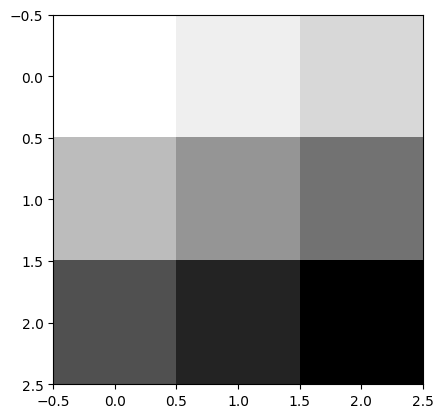

In [3]:
image = np.array([[[[1],[2],[3]],
                   [[4],[5],[6]],
                   [[7],[8],[9]]]], dtype=np.float32)
print(image.shape)
plt.imshow(image.reshape(3,3), cmap='Greys')

## 1 filter (2,2,1,1) with padding: VALID

weight.shape = 1 filter (2 , 2 , 1, 1)
![image](https://cloud.githubusercontent.com/assets/901975/24833375/c0d9c262-1cf9-11e7-9efc-5dd6fe0fedb0.png)

## 1 filter (2,2,1,1) with padding:SAME
![image](https://cloud.githubusercontent.com/assets/901975/24833381/fd01869e-1cf9-11e7-9d59-df08c7c6e5c4.png)

## 3 filters (2,2,1,3)

## MAX POOLING
![image](https://cloud.githubusercontent.com/assets/901975/23337676/bd154da2-fc30-11e6-888c-d86bc2206066.png)

![image](https://cloud.githubusercontent.com/assets/901975/23340355/a4bd3c08-fc6f-11e6-8a99-1e3bbbe86733.png)


## SAME: Zero paddings

![image](https://cloud.githubusercontent.com/assets/901975/23340337/71b27652-fc6f-11e6-96ef-760998755f77.png)

In [6]:
image = np.array([[[[4],[3]],
                    [[2],[1]]]], dtype=np.float32)
pool = tf.nn.max_pool(image, ksize=[1, 2, 2, 1],
                    strides=[1, 1, 1, 1], padding='SAME')
print(pool.shape)

(1, 2, 2, 1)


In [9]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_test = x_test / 255
x_train = x_train / 255
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)


11490434/11490434 [==============================] - 1s 0us/step


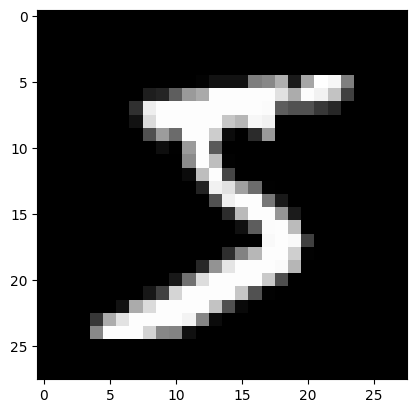

In [11]:
img = x_train[0].reshape(28,28)
plt.imshow(img, cmap='gray')

# Lab - MNIST and Convolutional Neural Network

In [12]:
import numpy as np
import tensorflow as tf
import random

mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_test = x_test / 255
x_train = x_train / 255
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

# one hot encode y data
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# hyper parameters
learning_rate = 0.001
training_epochs = 12
batch_size = 128

tf.model = tf.keras.Sequential()
# L1
#tf.model.add(tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), input_shape=(28, 28, 1), activation='relu'))
tf.model.add(tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), input_shape=(28, 28, 1), activation='relu', padding='SAME'))
tf.model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

# L2
tf.model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
tf.model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

# L3 fully connected
tf.model.add(tf.keras.layers.Flatten())
tf.model.add(tf.keras.layers.Dense(units=10, kernel_initializer='glorot_normal', activation='softmax'))

tf.model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(lr=learning_rate), metrics=['accuracy'])
tf.model.summary()

tf.model.fit(x_train, y_train, batch_size=batch_size, epochs=training_epochs)

# predict 10 random hand-writing data
y_predicted = tf.model.predict(x_test)
for x in range(0, 10):
    random_index = random.randint(0, x_test.shape[0]-1)
    print("index: ", random_index,
          "actual y: ", np.argmax(y_test[random_index]),
          "predicted y: ", np.argmax(y_predicted[random_index]))

evaluation = tf.model.evaluate(x_test, y_test)
print('loss: ', evaluation[0])
print('accuracy', evaluation[1])


print(tf.model.trainable_weights)






Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 32)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1152)              0         
                                                                 
 dense (Dense)               (None, 10)                1